# Gaussian Naive Bayes

## Import Libraries

In [60]:
import numpy as np
import matplotlib.pyplot as plt

The Gaussian Naive Bayes algorithm estimates the probability of a class (C) given a set of features (X) using the following formula:

P(C | X) = ( P(X | C) * P(C) ) / P(X)

Where:
- P(C | X) is the posterior probability of class C given features X.
- P(X | C) is the likelihood of observing features X given class C, assuming Gaussian distribution.
- P(C) is the prior probability of class C.
- P(X) is the probability of observing features X.

In Gaussian Naive Bayes, the likelihood P(X | C) is modeled as a Gaussian (normal) distribution for each feature given each class.

Assuming X = (x₁, x₂, ..., xₙ) represents the features and μᵢ and σᵢ are the mean and standard deviation of the i-th feature for class C, the Gaussian probability density function (PDF) for each feature is:

P(xᵢ | C) = (1 / √(σᵢ * 2π)) * e^(-((xᵢ - μᵢ)²) / (2 * σᵢ²))

Where:
- xᵢ is the value of the i-th feature in the input.
- μᵢ is the mean of the i-th feature for class C.
- σᵢ is the standard deviation of the i-th feature for class C.
- e is the base of the natural logarithm.
- π is the mathematical constant pi.

To classify an input with features X into a class C, you calculate the posterior probabilities for each class and choose the class with the highest probability.

Keep in mind that Gaussian Naive Bayes assumes that features are independent given the class, which might not always hold in real-world scenarios. Despite this simplifying assumption, Gaussian Naive Bayes can work well for certain types of data distributions.


## Model Architecture

In [61]:
import numpy as np

class GaussianNaiveBayes:
    """
    Gaussian Naive Bayes classifier for multi-class classification.

    Attributes:
        classes (numpy.ndarray): Array of unique class labels.
        means (numpy.ndarray): Means of features for each class.
        variances (numpy.ndarray): Variances of features for each class.
        priors (numpy.ndarray): Priors (class probabilities) for each class.
    """

    def fit(self, X, y):
        """
        Fit the Gaussian Naive Bayes model to the training data.

        Parameters:
            X (numpy.ndarray): Training data features.
            y (numpy.ndarray): Training data labels.

        Returns:
            None
        """
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        self.means = np.zeros((len(self.classes), n_features))
        self.variances = np.zeros((len(self.classes), n_features))
        self.priors = np.zeros(len(self.classes))

        for class_idx, c in enumerate(self.classes):
            X_for_c = X[y == c]
            self.means[class_idx] = X_for_c.mean(axis=0)
            self.variances[class_idx] = X_for_c.var(axis=0)
            self.priors[class_idx] = X_for_c.shape[0] / float(n_samples)

    def predict(self, X):
        """
        Predict the class labels for input data using trained model.

        Parameters:
            X (numpy.ndarray): Input data features.

        Returns:
            numpy.ndarray: Predicted class labels for each input sample.
        """
        return [self._classify_sample(x) for x in X]
    
    def _classify_sample(self, x):
        """
        Classify a single input sample based on trained model.

        Parameters:
            x (numpy.ndarray): Input sample features.

        Returns:
            int: Predicted class label for the input sample.
        """
        posteriors = []

        for class_idx, c in enumerate(self.classes):
            prior = np.log(self.priors[class_idx])
            likelihood = np.sum(np.log(self._calculate_likelihood(x, class_idx)))
            posterior = prior + likelihood
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]
    
    def _calculate_likelihood(self, x, class_idx):
        """
        Calculate the likelihood of input features given a class.

        Parameters:
            x (numpy.ndarray): Input sample features.
            class_idx (int): Index of the class.

        Returns:
            numpy.ndarray: Likelihoods of the input features given the class.
        """
        mean = self.means[class_idx]
        var = self.variances[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


## Dataset

In [62]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Train model

In [63]:
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

## Evaluate Model

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


## Visualization

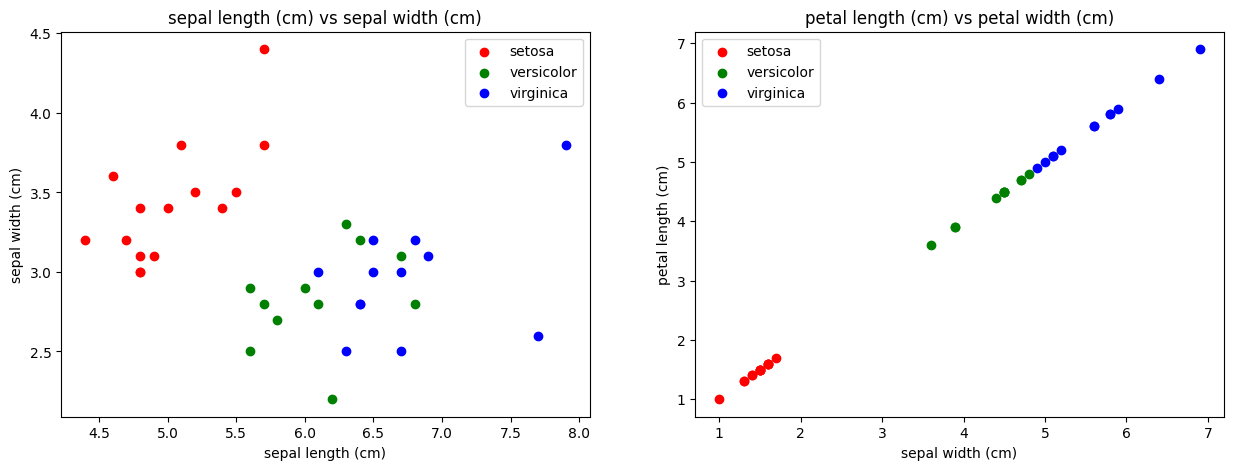

In [65]:
colors = ['r', 'g', 'b']

target_names = iris.target_names 
feature_names = iris.feature_names

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, target_name in enumerate(target_names):
    ax[0].scatter(X_test[y_test==i, 0], X_test[y_test==i, 1], c=colors[i], label=target_name)

ax[0].set_xlabel(feature_names[0])
ax[0].set_ylabel(feature_names[1])
ax[0].set_title(f"{feature_names[0]} vs {feature_names[1]}")
ax[0].legend()


for i, target_name in enumerate(target_names):
    ax[1].scatter(X_test[y_test==i, 2], X_test[y_test==i, 2], c=colors[i], label=target_name)

ax[1].set_xlabel(feature_names[1])
ax[1].set_ylabel(feature_names[2])
ax[1].set_title(f"{feature_names[2]} vs {feature_names[3]}")
ax[1].legend()